In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
wine = pd.read_csv('/content/sample_data/winequality-red.csv')

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine = wine.rename(columns = {'fixed acidity': 'Fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar':'residual_sugar', 'free sulfur dioxide': 'free_sulfur', 'total sulfur dioxide': 'total_sulfur' })

In [ ]:
wine

,Fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur,total_sulfur,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: >

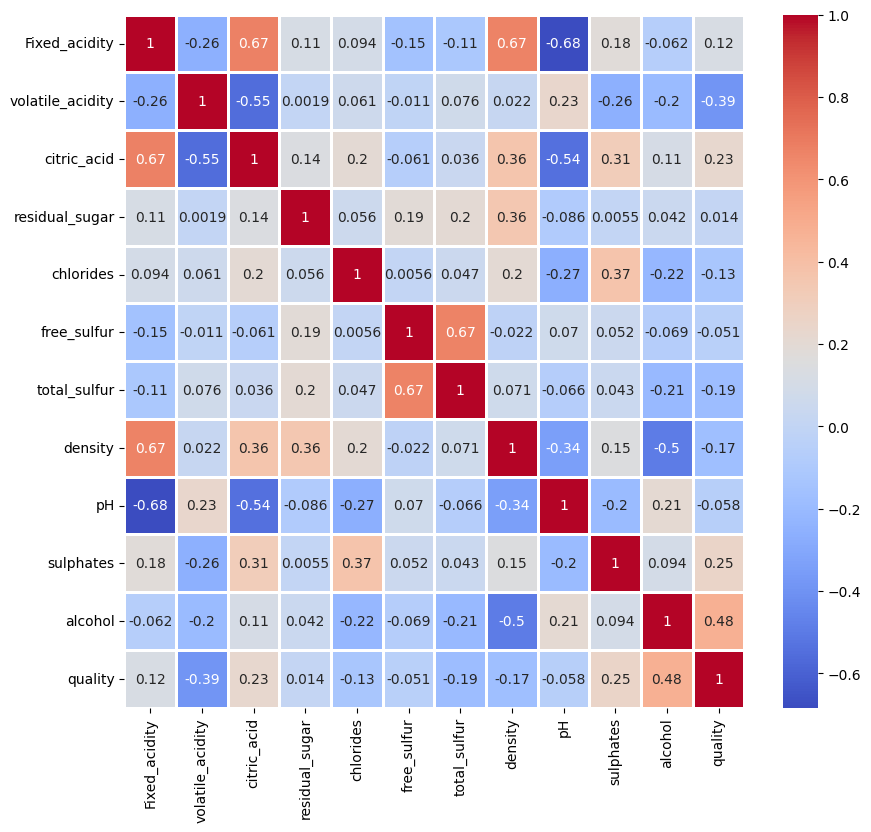

In [ ]:
wine.corr()

plt.figure(figsize =(10, 9))

sns.heatmap(wine.corr(), annot = True, cmap = 'coolwarm', linewidths = 2)

In [ ]:
for i in wine.columns:
  dup_val  = wine[i].duplicated().sum()
  print(i , dup_val)

Fixed_acidity 1503
volatile_acidity 1456
citric_acid 1519
residual_sugar 1508
chlorides 1446
free_sulfur 1539
total_sulfur 1455
density 1163
pH 1510
sulphates 1503
alcohol 1534
quality 1593


In [ ]:
wine

,Fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur,total_sulfur,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#wine.drop_duplicates(subset = 'density', inplace = True)

In [ ]:
wine

,Fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur,total_sulfur,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
wine['quality'].dtype

dtype('int64')

In [ ]:
wine_encoder = {3: 1, 4: 2, 5: 3, 6: 4, 7:5 , 8:6}
wine['quality'] = wine['quality'].map(wine_encoder)

In [ ]:
wine['quality'].unique()

array([3, 4, 5, 2, 6, 1])

In [ ]:
wine

,Fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur,total_sulfur,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,3
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,3
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,3
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,4
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,3
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,4
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,4
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,3


In [ ]:
y_label = wine['quality']


In [ ]:
wine.drop('quality', axis = 1, inplace = True)

In [ ]:
wine.drop

<bound method DataFrame.drop of       Fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur  total_sulfur  density    pH  sulphates  alcohol  
0            11.0          34.0  0.99780  3.51       0.56      9.4  
1            25.0          67.0  0.99680  3.20       0.68      9.8  
2            15.0          54.0  0.99700  3.26       0.65      9.8  
3            17.0          60.0  0.99800  3.16       0.58      9.8  
4            11.0          34.0  0.99780  3.51       0.56      9.4  
...           ...           ...      ...   ...        ...      ...  
1594         32.0          44.0  0.99490  3.45       0.58     10.5  
1595         39.0          51.0  0.99512  3.52       0.76     11.2  
1596         29.0          40.0  0.99574  3.42       0.75     11.0  
1597         32.0          44.0  0.99547  3.57       0.71     10.2  
1598         18.0          42.0  0.99549  3.39       0.66     11.0  

[1599 rows x 11 columns]>

In [ ]:
wine.drop(['citric_acid', 'total_sulfur', 'density'], axis= 1, inplace = True)

In [ ]:
wine

,Fixed_acidity,volatile_acidity,residual_sugar,chlorides,free_sulfur,pH,sulphates,alcohol
0,7.4,0.700,1.9,0.076,11.0,3.51,0.56,9.4
1,7.8,0.880,2.6,0.098,25.0,3.20,0.68,9.8
2,7.8,0.760,2.3,0.092,15.0,3.26,0.65,9.8
3,11.2,0.280,1.9,0.075,17.0,3.16,0.58,9.8
4,7.4,0.700,1.9,0.076,11.0,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,32.0,3.45,0.58,10.5
1595,5.9,0.550,2.2,0.062,39.0,3.52,0.76,11.2
1596,6.3,0.510,2.3,0.076,29.0,3.42,0.75,11.0
1597,5.9,0.645,2.0,0.075,32.0,3.57,0.71,10.2


<Axes: ylabel='Fixed_acidity'>

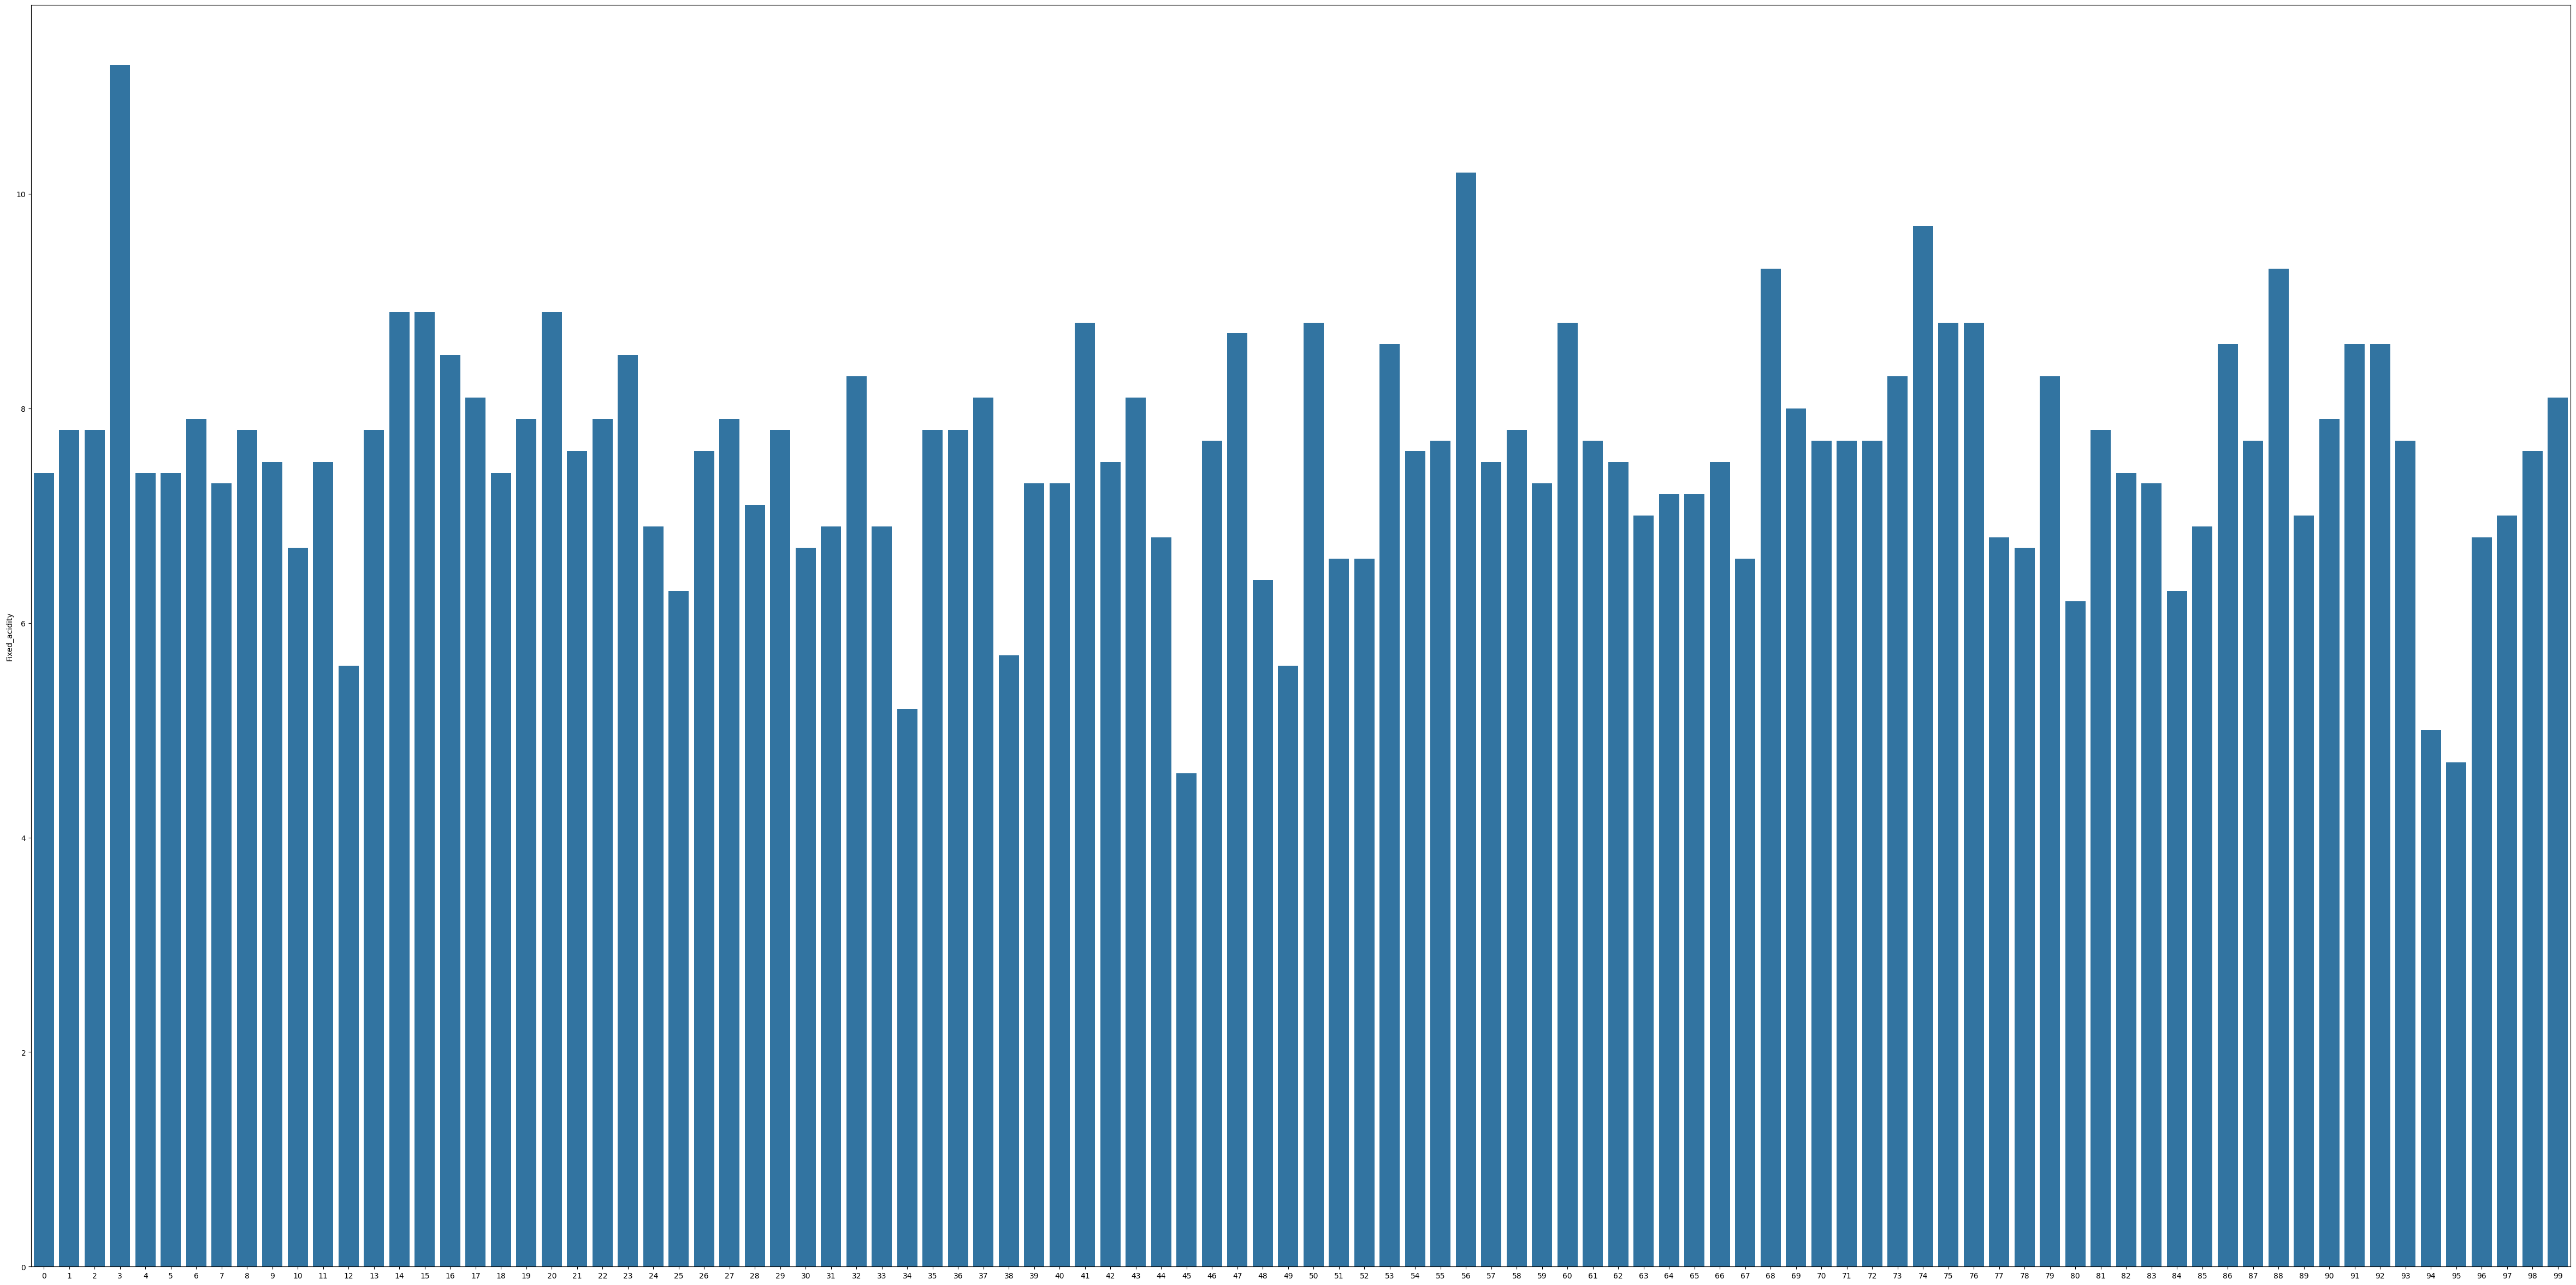

In [ ]:
plt.figure(figsize = (60, 30))
sns.barplot(wine['Fixed_acidity'][0:100])

<Axes: ylabel='free_sulfur'>

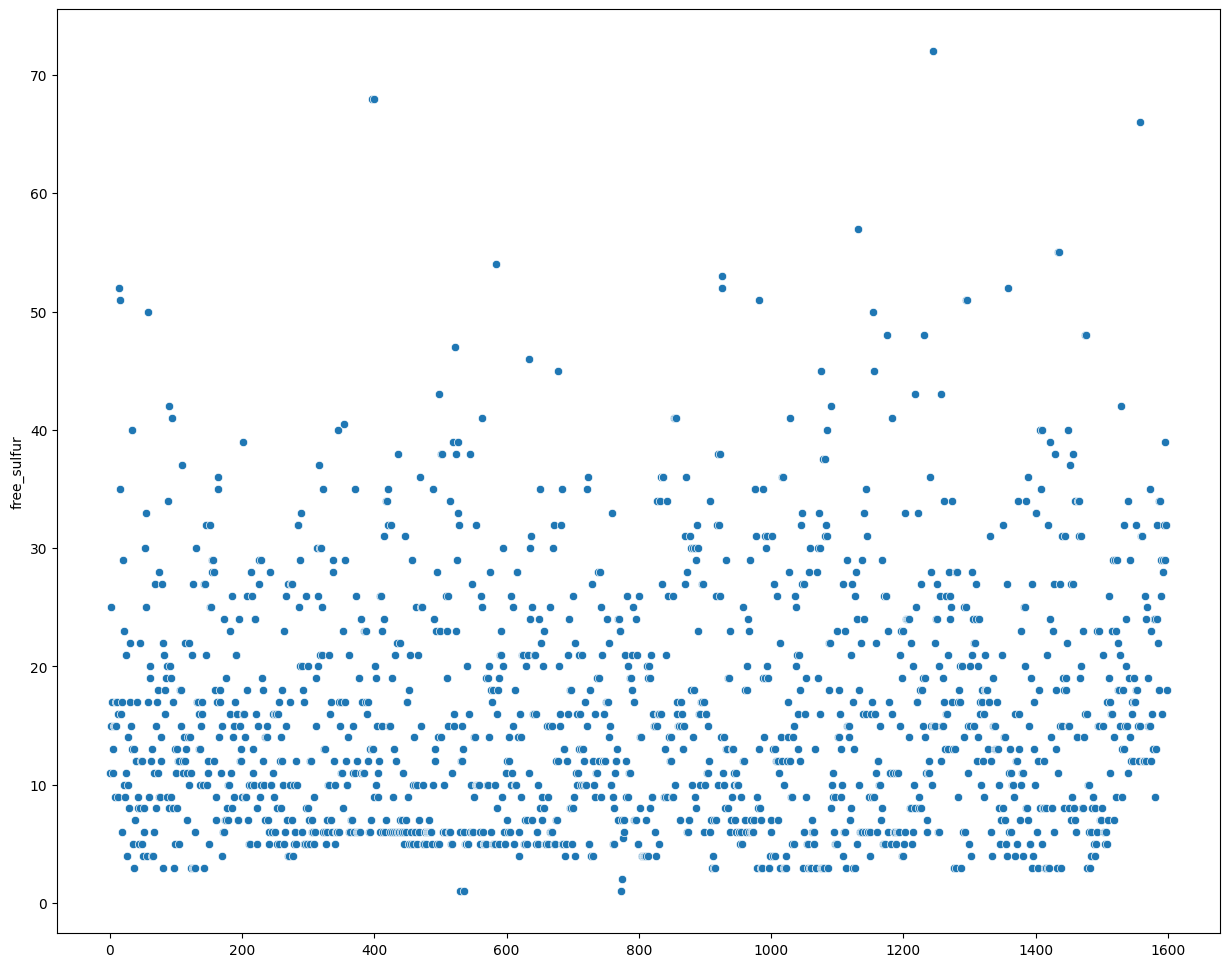

In [ ]:
plt.figure(figsize = (15, 12))
sns.scatterplot(wine['free_sulfur'])

<Axes: ylabel='free_sulfur'>

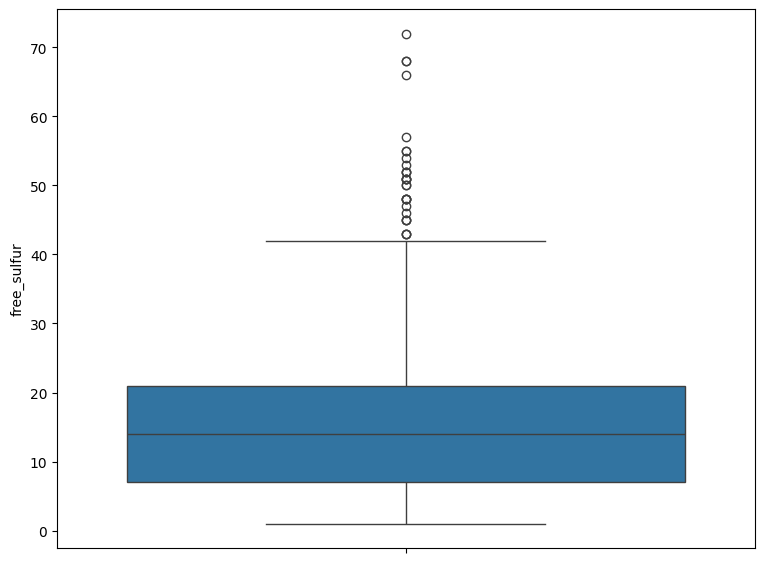

In [ ]:
plt.figure(figsize = (9, 7))
sns.boxplot(wine['free_sulfur'])

In [ ]:
wine['residual_sugar'].mean()

2.53880550343965

In [ ]:
wine

,Fixed_acidity,volatile_acidity,residual_sugar,chlorides,free_sulfur,pH,sulphates,alcohol
0,7.4,0.700,1.9,0.076,11.0,3.51,0.56,9.4
1,7.8,0.880,2.6,0.098,25.0,3.20,0.68,9.8
2,7.8,0.760,2.3,0.092,15.0,3.26,0.65,9.8
3,11.2,0.280,1.9,0.075,17.0,3.16,0.58,9.8
4,7.4,0.700,1.9,0.076,11.0,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,32.0,3.45,0.58,10.5
1595,5.9,0.550,2.2,0.062,39.0,3.52,0.76,11.2
1596,6.3,0.510,2.3,0.076,29.0,3.42,0.75,11.0
1597,5.9,0.645,2.0,0.075,32.0,3.57,0.71,10.2


Text(0, 0.5, 'Frequency')

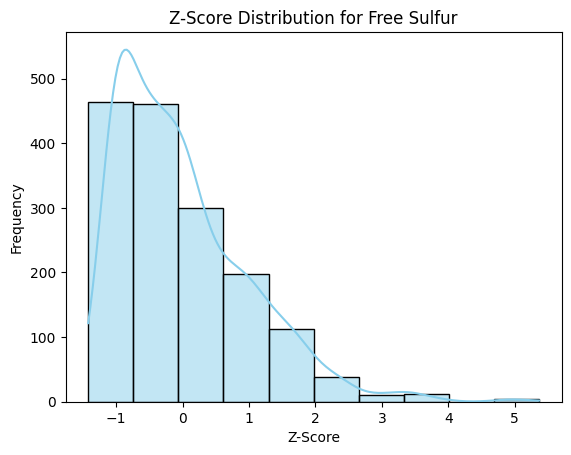

In [ ]:
from scipy.stats import zscore

wine['free_sulfur_zscore'] = zscore(wine['free_sulfur'])

sns.histplot(wine['free_sulfur_zscore'], bins=10, kde=True, color='skyblue')
plt.title('Z-Score Distribution for Free Sulfur')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')

In [ ]:
SC = StandardScaler()
SC_wine = SC.fit_transform(wine)

In [ ]:
SC_wine

array([[-0.52835961,  0.96187667, -0.45321841, ..., -0.57920652,
        -0.96024611, -0.46619252],
       [-0.29854743,  1.96744245,  0.04341614, ...,  0.1289504 ,
        -0.58477711,  0.87263823],
       [-0.29854743,  1.29706527, -0.16942723, ..., -0.04808883,
        -0.58477711, -0.08366945],
       ...,
       [-1.1603431 , -0.09955388, -0.16942723, ...,  0.54204194,
         0.54162988,  1.2551613 ],
       [-1.39015528,  0.65462046, -0.38227061, ...,  0.30598963,
        -0.20930812,  1.54205361],
       [-1.33270223, -1.21684919,  0.75289408, ...,  0.01092425,
         0.54162988,  0.20322286]])

In [ ]:
wine_shape = np.shape(SC_wine)
wine_shape

(1599, 9)

In [ ]:
SC_wine[435][7]

-0.8663788579309919

In [ ]:
for i in range(wine_shape[0]):
  for j in range(wine_shape[1]):
    if SC_wine[i][j] > 1.5 or SC_wine[i][j] < -1.5:
      print(SC_wine[i][j])

1.9674424541409123
1.6548560786997
2.526588902451241
2.526588902451241
-1.5625144124544335
1.742192384250734
5.32210116796055
1.881665507905276
3.454668962073944
3.454668962073944
1.75414317623542
3.359038194288537
1.6042773232048406
3.359038194288537
1.8289459097220289
1.8289459097220289
5.96238012134068
3.66973501473579
5.388529628826326
-1.7566177939214629
2.489473476718105
-1.7196320831424572
5.790187383944274
2.3070997486490628
2.3070997486490628
-1.7923265903940142
2.100902143995628
-1.505061367969538
3.364061597051279
1.7966506201253716
2.38469331629937
2.38469331629937
5.197246131321542
3.1976303995287156
-2.137044857303386
3.815561378723146
2.512842104764378
2.274698665581193
-1.5625144124544335
1.6376843741512153
1.6376843741512153
-1.7566177939214629
1.8171109716918856
3.26340742650313
3.26340742650313
-1.5824288294429105
-1.5824288294429105
1.7223034770066086
2.725525784321642
8.00273742805838
3.66973501473579
6.663752945524891
2.8435519381234093
-2.469338385771354
7.623611

In [ ]:
SC_wine.max()

11.127034553969864

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(SC_wine, y_label, test_size = 0.3, random_state = 42)

In [ ]:
np.shape(x_train)

(1119, 9)

In [ ]:
x_train

array([[ 0.16107692, -1.71963208, -0.45321841, ...,  1.25019886,
         0.54162988,  3.55029973],
       [ 2.40174566, -0.37887771, -0.38227061, ...,  1.25019886,
        -0.20930812, -0.94434636],
       [-0.6432657 ,  0.06804042,  0.04341614, ...,  0.30598963,
         0.54162988, -0.37056175],
       ...,
       [-0.6432657 ,  0.51495855,  0.11436394, ..., -0.69723268,
        -0.86637886, -0.08366945],
       [-0.24109439, -1.83136161, -0.59511399, ...,  0.83710732,
         1.38643512, -0.84871559],
       [-1.44760832, -1.32857872, -0.59511399, ..., -0.69723268,
         2.8883111 , -1.23123866]])

Text(0, 0.5, 'Frequency')

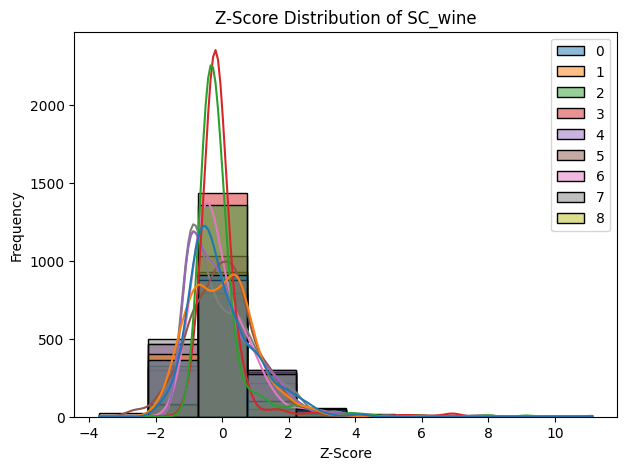

In [ ]:
plt.figure(figsize =(7, 5))

sns.histplot(SC_wine, bins=10, kde=True, color='skyblue')
plt.title('Z-Score Distribution of SC_wine')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=30, max_features= 7),
    n_estimators=50,
    random_state=42
)

In [ ]:
bagging_model.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=30,
                                                   max_features=7),
                  n_estimators=50, random_state=42)

In [ ]:
y_pred = bagging_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.6541666666666667